# Class Imbalance Problem by Software Defect Prediction

### Abstract

Software defect prediction is a field which has encouraged researchers to develop sophisticated detection techniques using Machine Learning methods. The issues is that often the data available for the problem is highly imbalanced which makes it difficult for the classifiers to detect the defects. In order to overcome this issue several methods have been found out and all these methods can be classified mainly in three different categories namely,

#### 1. Resampling based methods:
These methods either use undersampling and oversampling techniques in order to transform the imbalanced dataset to a balanced one.

#### 2. Cost Sensitive Learning base models:
These kind of methods considers the cost associated with misclassifying examples and tries to make the classifier favor to the minority-class by adding different cost factors into the algorithms.

#### 3. Ensemble Learning:
These kind of methods tries to improve the performance of the imbalanced dataset 

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import random

In [32]:
#cm1 = pd.read_csv("data/CM1.csv")
#print(sum(cm1.Defective == "Y"),cm1.shape[0],sum(cm1.Defective == "Y")/cm1.shape[0] * 100)
#jm1 = pd.read_csv("data/JM1.csv")
#print(sum(jm1.label == "Y"),jm1.shape[0],sum(jm1.label == "Y")/jm1.shape[0] * 100)
#kc1 = pd.read_csv("data/KC1.csv")
#print(sum(kc1.Defective == "Y"),kc1.shape[0],sum(kc1.Defective == "Y")/kc1.shape[0] * 100)
datasets = ['CM1','JM1','KC1','KC3','KC4','MC1','MC2','MW1','PC1','PC2','PC3','PC4','PC5']
d = {}
df = pd.DataFrame(columns = ["Project","Number of Defective instances","Total Number of instances","Percentage of Defective Instances"]
)
#df.columns = ["Project","Number of Defective instances","Total Number of instances","Percentage of Defective Instances"]

for i in range(len(datasets)):
    d[i] = pd.read_csv("data/"+datasets[i]+".csv")
    try:
        df.loc[len(df)] = [datasets[i],sum(d[i][d[i].columns[-1]] == "Y"),d[i].shape[0],sum(d[i][d[i].columns[-1]] == "Y")/d[i].shape[0] * 100]
        print(datasets[i],sum(d[i][d[i].columns[-1]] == "Y"),d[i].shape[0],sum(d[i][d[i].columns[-1]] == "Y")/d[i].shape[0] * 100)
    except:
        continue

CM1 42 344 12.209302325581394
JM1 1759 9591 18.340110520279428
KC1 325 2095 15.513126491646778
KC3 36 200 18.0
MC1 68 8737 0.7782991873640838
MC2 44 125 35.199999999999996
MW1 27 263 10.26615969581749
PC1 61 735 8.299319727891156
PC2 16 1493 1.0716677829872738
PC3 138 1099 12.556869881710647
PC4 178 1379 12.907904278462654
PC5 502 16962 2.9595566560547106


In [33]:
df

,Project,Number of Defective instances,Total Number of instances,Percentage of Defective Instances
0,CM1,42,344,12.209302
1,JM1,1759,9591,18.340111
2,KC1,325,2095,15.513126
3,KC3,36,200,18.000000
4,MC1,68,8737,0.778299
5,MC2,44,125,35.200000
6,MW1,27,263,10.266160
7,PC1,61,735,8.299320
8,PC2,16,1493,1.071668
9,PC3,138,1099,12.556870


We'd use the following techniques in order to deal with the selected datasets:

1. Ordinary Algorithms with Hyper-parameter tuning (if possible):
    - Support Vector Machine
    - Logistic Regression
2. Ensemble Based Methods:
    - Random Forests
    - Bagging
    - Boosting
3. Cluster-Based Over-Sampling with Filtering
    - Support Vector Machine
    - Logistic Regression
    - Random Forest
    - Bagging
    - Boosting

Note: we'd use **PCA** in order to reduce the over-fitting if required.

In [34]:
KC1 = d[2]
PC4 = d[11]
PC3 = d[10]

In [35]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Analysis for PC3

PC3.dtypes

LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DECISION_DENSITY                   float64
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                     float64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                  float64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT                    float64
HALSTEAD_ERROR_EST                 float64
HALSTEAD_LENGTH                      int64
HALSTEAD_LEVEL                     float64
HALSTEAD_PR

In [36]:
## Correcting Defective label to int

PC3['Defective'] = (PC3['Defective'] == "Y")*1
PC3.dtypes

LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DECISION_DENSITY                   float64
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                     float64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                  float64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT                    float64
HALSTEAD_ERROR_EST                 float64
HALSTEAD_LENGTH                      int64
HALSTEAD_LEVEL                     float64
HALSTEAD_PR

In [37]:
##### Since, the number of defective instances is very less, we'd use 10-Fold cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,balanced_accuracy_score

kf = StratifiedKFold(n_splits=5)
X = PC3[PC3.columns[:-1]]
y = PC3[PC3.columns[-1]]
yo = y.copy()

X = (X-X.mean())/X.std()
X.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,...,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03
mean,1.461777e-16,3.769101e-16,-1.411266e-16,5.290480e-16,1.495114e-16,-1.754738e-16,-1.414297e-17,1.517642e-15,1.709279e-16,-1.397022e-15,...,-3.433711e-16,-5.424839e-17,-2.453805e-15,-3.535742e-19,1.242561e-17,5.051060e-19,-5.166224e-16,6.869442e-18,-8.409005e-16,6.970463e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.991591e-01,-4.821283e-01,-9.169118e-01,-4.818016e-01,-5.402611e-01,-3.657256e-01,-4.860520e-01,-2.031700e+00,-3.458164e-01,-4.765735e-01,...,-3.676015e-01,-5.090169e-01,-1.613836e+00,-3.839532e-01,-3.714910e-01,-5.773317e-01,-1.755379e+00,-6.904345e-01,-8.423061e-01,-5.565335e-01
25%,-7.009070e-01,-3.119198e-01,-5.970115e-01,-4.818016e-01,-5.402611e-01,-3.204221e-01,-3.199023e-01,-7.274270e-01,-3.458164e-01,-4.765735e-01,...,-3.225631e-01,-3.342248e-01,-8.262668e-01,-2.953668e-01,-2.862631e-01,-3.952889e-01,-6.479385e-01,-5.209980e-01,-8.423061e-01,-4.096130e-01
50%,-4.061506e-01,-2.268156e-01,-2.771111e-01,-4.818016e-01,-4.434808e-01,-1.845117e-01,-2.368275e-01,-1.903737e-01,-2.522766e-01,-4.765735e-01,...,-1.874481e-01,-2.343436e-01,-2.137130e-01,-2.012438e-01,-1.920638e-01,-2.360014e-01,-1.733210e-01,-3.176742e-01,-3.809339e-01,-2.417037e-01
75%,3.798665e-01,2.849714e-02,3.626896e-01,8.299835e-02,1.372008e-01,-3.297796e-03,1.239697e-02,4.234016e-01,2.834281e-02,7.263667e-02,...,-7.294656e-03,1.535934e-02,5.738561e-01,8.438476e-04,-1.422438e-03,1.053289e-01,4.595023e-01,1.736917e-01,6.576836e-01,6.263175e-02
max,6.766255e+00,2.453852e+01,6.760697e+00,1.137900e+01,7.008599e+00,2.554786e+01,2.427025e+01,3.645722e+00,2.621949e+01,7.761580e+00,...,2.539434e+01,2.348744e+01,3.549117e+00,2.183462e+01,2.468103e+01,1.728562e+01,8.369793e+00,1.433858e+01,3.902402e+00,1.652823e+01


In [38]:
sum(yo == 1)

138

In [39]:
# Now we'd use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
XT = pca.fit_transform(X)
pca.explained_variance_ratio_*100

array([49.2723769 , 11.22289996,  8.51888799,  5.35877651,  4.56610657,
        4.31306529,  3.07847677,  2.42708086,  1.8435184 ])

In [40]:
df = pd.DataFrame()
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = XT[:,i]
df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-0.243582,-0.675537,0.836854,-1.008370,-0.063362,-0.408388,-0.407197,0.338865,-0.232905
1,-2.532225,0.367399,2.131764,0.456583,0.723855,3.224210,-1.181362,-1.511896,0.765011
2,1.133316,-1.682567,-1.280294,-1.362618,-0.343325,0.068784,-0.050652,-0.101901,-0.245639
3,0.570636,-1.159499,-1.030048,-0.256622,1.003609,-1.976297,0.675995,-2.024189,-0.764585
4,-1.744444,-0.443792,1.353137,-0.047835,-1.190060,1.509367,0.522666,0.081204,0.010212


In [13]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "rbf",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.0
Batch Balanced Accuracy: 0.4844559585492228
Recall: 0.03571428571428571
Batch Balanced Accuracy: 0.5126488095238095
Recall: 0.0
Batch Balanced Accuracy: 0.4921875
Recall: 0.07407407407407407
Batch Balanced Accuracy: 0.5318287037037037
Recall: 0.037037037037037035
Batch Balanced Accuracy: 0.5185185185185185
Average Balanced Accuracy: 0.5079278980590509
Std Balanced Accuracy: 0.017345828505138945
Average Recall Score: 0.02936507936507936
Std Recall Score: 0.027650248953341627


In [16]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "linear",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.0
Batch Balanced Accuracy: 0.5
Recall: 0.0
Batch Balanced Accuracy: 0.5
Recall: 0.0
Batch Balanced Accuracy: 0.5
Recall: 0.0
Batch Balanced Accuracy: 0.5
Recall: 0.0
Batch Balanced Accuracy: 0.5
Average Balanced Accuracy: 0.5
Std Balanced Accuracy: 0.0
Average Recall Score: 0.0
Std Recall Score: 0.0


In [17]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "poly",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.25
Batch Balanced Accuracy: 0.591321243523316
Recall: 0.21428571428571427
Batch Balanced Accuracy: 0.5941220238095238
Recall: 0.07142857142857142
Batch Balanced Accuracy: 0.5200892857142857
Recall: 0.18518518518518517
Batch Balanced Accuracy: 0.5509259259259259
Recall: 0.14814814814814814
Batch Balanced Accuracy: 0.5662615740740741
Average Balanced Accuracy: 0.5645440106094252
Std Balanced Accuracy: 0.0274098664265062
Average Recall Score: 0.1738095238095238
Std Recall Score: 0.06117692692608083


In [18]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "sigmoid",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.21428571428571427
Batch Balanced Accuracy: 0.5346039970392302
Recall: 0.14285714285714285
Batch Balanced Accuracy: 0.5271577380952381
Recall: 0.07142857142857142
Batch Balanced Accuracy: 0.4836309523809524
Recall: 0.18518518518518517
Batch Balanced Accuracy: 0.5665509259259259
Recall: 0.3333333333333333
Batch Balanced Accuracy: 0.6380208333333334
Average Balanced Accuracy: 0.5499928893549361
Std Balanced Accuracy: 0.05135222743921971
Average Recall Score: 0.1894179894179894
Std Recall Score: 0.0865301817587206


We have used 10 components which covers around 90% of the complete variance
Since multiple values of C and gamma are optimal for each fold, we can conclude that further hyper-parameter tuning won't lead to much improved results but only overfitting the data itself. Hence we'd report the results on the complete dataset are as follows:

- *Balanced Accuracy*: **0.83** (Higher values due to absence of true samples in certain folds)
- *Recall Score*: **0.143**

Now we'd try **Logistic Regression** itself on the transformed data.

In [19]:
bal = []
recall = []

#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    lr = LogisticRegression(solver = 'lbfgs')
    #grid = GridSearchCV(lr,param_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    lr.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    y_pred = lr.predict(Xtest)
    r = recall_score(ytest,y_pred)
    b = balanced_accuracy_score(ytest,y_pred)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

print("============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.03571428571428571
Batch Balanced Accuracy: 0.4997224278312361
Recall: 0.14285714285714285
Batch Balanced Accuracy: 0.5714285714285714
Recall: 0.0
Batch Balanced Accuracy: 0.4791666666666667
Recall: 0.1111111111111111
Batch Balanced Accuracy: 0.5321180555555556
Recall: 0.1111111111111111
Batch Balanced Accuracy: 0.5503472222222222
Average Balanced Accuracy: 0.5265565887408504
Std Balanced Accuracy: 0.03339549637547987
Average Recall Score: 0.08015873015873015
Std Recall Score: 0.05338149752634996


Now we'd try ensemble based models such as:
- Random Forest
- Bagging

In [20]:
from sklearn.ensemble import RandomForestClassifier

bal = []
recall = []

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    rf = RandomForestClassifier(n_estimators = 100)
    #grid = GridSearchCV(lr,param_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    rf.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    y_pred = rf.predict(Xtest)
    r = recall_score(ytest,y_pred)
    b = balanced_accuracy_score(ytest,y_pred)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===========")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.07142857142857142
Batch Balanced Accuracy: 0.5072168763878608
Recall: 0.10714285714285714
Batch Balanced Accuracy: 0.5483630952380952
Recall: 0.0
Batch Balanced Accuracy: 0.4817708333333333
Recall: 0.1111111111111111
Batch Balanced Accuracy: 0.5269097222222222
Recall: 0.07407407407407407
Batch Balanced Accuracy: 0.529224537037037
Average Balanced Accuracy: 0.5186970128437096
Std Balanced Accuracy: 0.022599513587176694
Average Recall Score: 0.07275132275132275
Std Recall Score: 0.039876071283421737


In [21]:
from sklearn.naive_bayes import GaussianNB

bal = []
recall = []

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    nb = GaussianNB()
    #grid = GridSearchCV(lr,param_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    nb.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    y_pred = nb.predict(Xtest)
    r = recall_score(ytest,y_pred)
    b = balanced_accuracy_score(ytest,y_pred)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===========")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.10714285714285714
Batch Balanced Accuracy: 0.512120651369356
Recall: 0.35714285714285715
Batch Balanced Accuracy: 0.6707589285714286
Recall: 0.03571428571428571
Batch Balanced Accuracy: 0.48660714285714285
Recall: 0.2962962962962963
Batch Balanced Accuracy: 0.5856481481481481
Recall: 0.14814814814814814
Batch Balanced Accuracy: 0.5558449074074074
Average Balanced Accuracy: 0.5621959556706966
Std Balanced Accuracy: 0.06418327656722031
Average Recall Score: 0.18888888888888888
Std Recall Score: 0.11970833698553562


In [23]:
import tensorflow as tf
from os_elm import OS_ELM

In [24]:
def softmax(a):
    c = np.max(a, axis=-1).reshape(-1, 1)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a, axis=-1).reshape(-1, 1)
    return exp_a / sum_exp_a

In [27]:
result = []
for j in range(10,20,1):
    mbal = []
    mrecall = []
    for k in range(10):
        tf.reset_default_graph()
        n_input_nodes = 9
        n_hidden_nodes = j
        n_output_nodes = 2
        bal = []
        recall = []

        for train,test in kf.split(df,y):
            Xtrain,Xtest = df.values[train],df.values[test]
            ytrain,ytest = y.values[train],y.values[test]
            ytrain = ytrain.reshape(-1,1)
            ytest = ytest.reshape(-1,1)
            ytrain = np.hstack((ytrain == False,ytrain))
            os_elm1 = OS_ELM(
                # the number of input nodes.
                n_input_nodes=n_input_nodes,
                # the number of hidden nodes.
                n_hidden_nodes=n_hidden_nodes,
                # the number of output nodes.
                n_output_nodes=n_output_nodes,
                # loss function.
                # the default value is 'mean_squared_error'.
                # for the other functions, we support
                # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
                loss='binary_crossentropy',
                # activation function applied to the hidden nodes.
                # the default value is 'sigmoid'.
                # for the other functions, we support 'linear' and 'tanh'.
                # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
                activation='sigmoid',
            )
            border = int(2*n_hidden_nodes)
            Xtrain_init = Xtrain[:border]
            Xtrain_seq = Xtrain[border:]
            ytrain_init = ytrain[:border]
            ytrain_seq = ytrain[border:]
            os_elm1.init_train(Xtrain_init, ytrain_init)
            batch_size = 64
            for i in range(0, len(Xtrain_seq), batch_size):
                x_batch = Xtrain_seq[i:i+batch_size]
                t_batch = ytrain_seq[i:i+batch_size]
                os_elm1.seq_train(x_batch, t_batch)
            n_classes = n_output_nodes
            y_pred = os_elm1.predict(Xtest)
            y_pred = softmax(y_pred)
            res = []
            for ys in y_pred:
                res.append(np.argmax(ys))
            res = np.array(res)
            r = recall_score(ytest,res)
            b = balanced_accuracy_score(ytest,res)
            bal += [b]
            recall += [r]
            tf.reset_default_graph()

        bal = np.array(bal)
        recall = np.array(recall)
        mbal.append(np.mean(bal))
        mrecall.append(np.mean(recall))
    result.append((j,np.mean(mbal),np.std(mbal),np.mean(mrecall),np.std(mrecall)))

In [28]:
for i in result:
    print("J:",i[0])
    print("Average Balanced Accuracy:",i[1])
    print("Std Balanced Accuracy:",i[2])
    print("Average Recall:",i[3])
    print("Std Recall:",i[4])

J: 10
Average Balanced Accuracy: 0.5033310202319269
Std Balanced Accuracy: 0.00562144889057594
Average Recall: 0.012380952380952381
Std Recall: 0.010251996905636286
J: 11
Average Balanced Accuracy: 0.502155155132001
Std Balanced Accuracy: 0.004006329775096254
Average Recall: 0.010238095238095237
Std Recall: 0.007401783579433441
J: 12
Average Balanced Accuracy: 0.499797046769197
Std Balanced Accuracy: 0.005037191705912519
Average Recall: 0.0065608465608465606
Std Recall: 0.008904622004830233
J: 13
Average Balanced Accuracy: 0.5022634553965513
Std Balanced Accuracy: 0.0041451346982868875
Average Recall: 0.012433862433862432
Std Recall: 0.009321784357902747
J: 14
Average Balanced Accuracy: 0.5056990149614825
Std Balanced Accuracy: 0.005223349543809157
Average Recall: 0.020449735449735447
Std Recall: 0.00970654352518986
J: 15
Average Balanced Accuracy: 0.504805026969049
Std Balanced Accuracy: 0.004113142045934162
Average Recall: 0.01917989417989418
Std Recall: 0.010064216699273681
J: 16
Av

Random Forest also produces results similar to Logistic Regression and SVMs.

The average recall score as well as balanced accuracy score are higher for **Random Forest** as compared to the **SVM** and **Logistic Regression**.

Now we'd use the **KMFOS** technique which would generate extra samples and balance the dataset.

In [41]:
# Code for KMFOS

from sklearn.neighbors import NearestNeighbors

# Noise filtering step

def clni(n):
    nbrs = NearestNeighbors(n_neighbors = n, algorithm = 'auto', p = 2).fit(compData)
    distances,indices = nbrs.kneighbors(compData)
    dropped = []
    i = 0
    while i <len(compData):
        t,f = 0,0
        for j in range(n-1):
            if compData['defects'][indices[i][j+1]] == True:
                t += 1
            else:
                f += 1
        if t>f and compData['defects'][i] == False:
            dropped.append(i)
        elif f>t and compData['defects'][i] == True:
            dropped.append(i)
        i+=1
    return dropped

# Over-sampling step

def overSamplingM(clusters,d,nplus,n):
    k = len(clusters)
    t = 0
    s = 0
    first = False
    second = False
    for i in range(k):
        first = False
        second = False
        ni = len(clusters[i])
        for j in range(i+1,k):
            nj = len(clusters[j])
            if ni + nj == 0:
                continue
            alpha = ni/(ni+nj)
            beta = nj/(ni+nj)
            total = ((ni+nj)/((k-1)*nplus))*n
            t += total
            r = int(total)
            if(total-r > 0.5):
                r = r+1
            s += r
            for l in range(r):
                if ni:
                    p = clusters[i].sample()
                    #print("P:",p)
                    first = True
                if nj:
                    q = clusters[j].sample()
                    #print("Q:",q)
                    second = True
                if first and second:
                    m = alpha*p[p.columns[:-1]] + beta*q[q.columns[:-1]].values
                    m['defects'] = True
                    #print("M:",m)
                    d = d.append(m,ignore_index = True)
                elif first:
                    m = alpha*p[:-1]
                    m['defects'] = True
                    #print(m)
                    d = d.append(m,ignore_index = True)
                elif second:
                    m = beta*q[:-1]
                    m['defects'] = True
                    #print(m)
                    d = d.append(m,ignore_index = True)  
    #print(s)
    #print(t)
    return d

# Code for peforming initial clustering

def InitialClustering(dat,k):
    kmeans = KMeans(n_clusters = k, init = 'k-means++',max_iter=300,n_init = 10,random_state = 0)
    kmeans.fit(dat)
    clusters = {}
    for i in range(len(kmeans.labels_)):
        if kmeans.labels_[i] in clusters:
            clusters[kmeans.labels_[i]].append(dat.index[i])
        else:
            clusters[kmeans.labels_[i]] = [dat.index[i]]
    for key in clusters.keys():
        clusters[key] = np.array(clusters[key])
    return clusters

In [42]:
sum(y == 1)

138

In [43]:
df
data = df
data['defects'] = (y == 1)
sum(data['defects'])

138

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

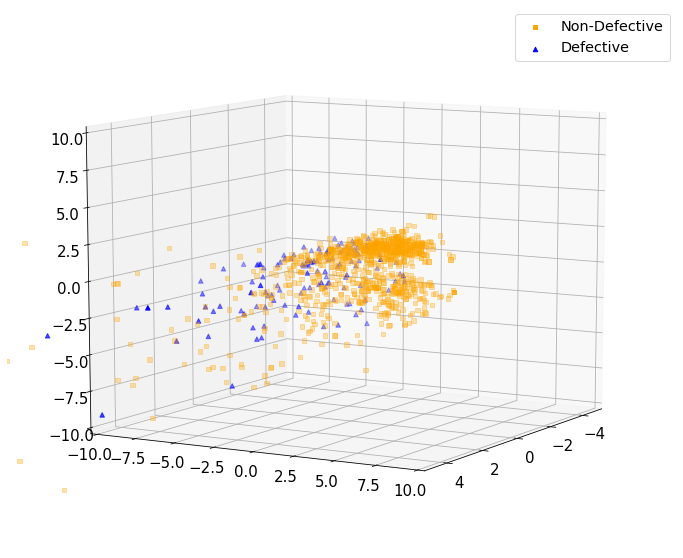

In [45]:
non = df[df['defects'] == False]
defective = df[df['defects'] == True]

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=15)
zline = non['pc3']
xline = non['pc1']
yline = non['pc2']
nond = ax.scatter3D(xline, yline, zline, color = 'orange',marker = "s")

zline = defective['pc3']
xline = defective['pc1']
yline = defective['pc2']
ax.set_xlim3d(-5,5)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(-10,10)
ond = ax.scatter3D(xline, yline, zline, color = 'blue',marker = "^")
ax.view_init(10, 30)
ax.legend([nond, ond], ['Non-Defective', 'Defective'],loc="best",fontsize = "x-large")
fig.savefig('original.png',dpi=300)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold

kf10 = StratifiedKFold(n_splits=5)

folds = []
for train,test in kf10.split(df[df.columns[:-1]],df[df.columns[-1]]):
    Xtrain = df.loc[train]
    Xtest,ytest = df.values[:,:-1][test],df.values[:,-1][test]
    test = (Xtest,ytest)
    params = {3:[5,15,20],5:[5,15,20],20:[5,15,20],50:[5,15,20]}
    result = {}
    key = 3
    val = 5
    for key in params.keys():
        for val in params[key]:
            X = Xtrain.copy()
            temp = Xtrain.defects
            X.index = [i for i in range(len(X))]
            Np = sum(X['defects'] == True)
            Nm = sum(X['defects'] == False)
            N = Nm - Np
            D = X.loc[X['defects'] == True]
            clusters = InitialClustering(D,key)
            for i in clusters.keys():
                clusters[i] = X.loc[clusters[i]]
            compData = overSamplingM(clusters,X,Np,N)
            compData = compData.dropna()
            #print("DefectiveInstances:",len(compData.groupby("defects").groups[True]))
            #print("NonDefectiveInstances:",len(compData.groupby("defects").groups[False]))
            dropped = clni(val)
            result[(key,val)] = compData.drop(index = dropped)
            #print("Defect:",len(result[(key,val)].groupby('defects').groups[True]))
            #print("NonDefect:",len(result[(key,val)].groupby('defects').groups[False]))
    print("Complete")    
    folds.append((result,test))

Complete
Complete
Complete
Complete
Complete


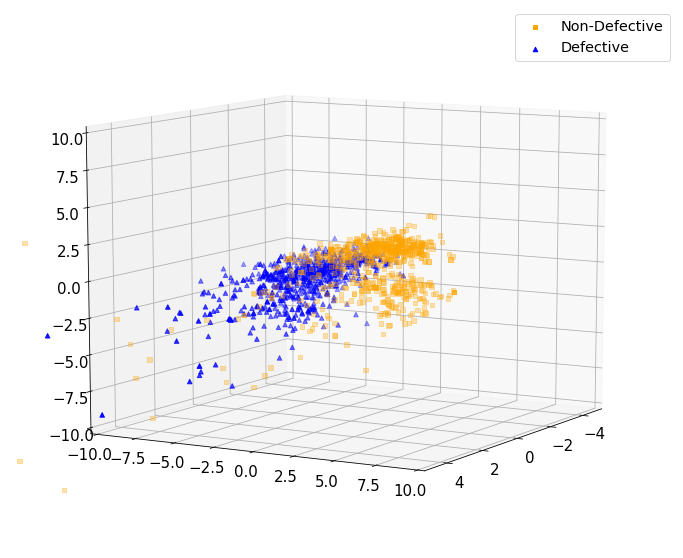

In [47]:
for fold in folds:
    df = fold[0][(3,5)]
    break
non = df[df['defects'] == False]
defective = df[df['defects'] == True]

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=15)
zline = non['pc3']
xline = non['pc1']
yline = non['pc2']
nond = ax.scatter3D(xline, yline, zline, color = 'orange',marker = "s")

zline = defective['pc3']
xline = defective['pc1']
yline = defective['pc2']
ax.set_xlim3d(-5,5)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(-10,10)
ond = ax.scatter3D(xline, yline, zline, color = 'blue',marker = "^")
ax.view_init(10, 30)
ax.legend([nond, ond], ['Non-Defective', 'Defective'],loc="best",fontsize = "x-large")
fig.savefig('oversampled.png',dpi=300)

In [52]:
sum(df['defects'])

138

The parameters of KMFOS method are **k** and **kn** which are the initial number of clusters formed and also the number of neighbors used for noise filtering step. For more details refer the paper. Now we'd simply fit the model on the balanced data set for each of the values of the parameters and average out the results. We'd use **80-20** split for each of the dataset.

In [55]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y)
        y_pred = lr.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]        

        
mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.7043756560926521
Std Balanced Accuracy: 0.05671780481470214
Average Recall Score: 0.6782186948853616
Std Recall Score: 0.0720311813831523


In [43]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'linear')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.7085908391079138
Std Balanced Accuracy: 0.0772299667600248
Average Recall Score: 0.7209706959706961
Std Recall Score: 0.15539448497495906


In [56]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'poly')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.668611820747777
Std Balanced Accuracy: 0.029282170167260056
Average Recall Score: 0.6021604938271604
Std Recall Score: 0.08185158512554366


In [57]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'sigmoid')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6982749903477989
Std Balanced Accuracy: 0.028574754852527934
Average Recall Score: 0.717173721340388
Std Recall Score: 0.11150508158106248


In [58]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'rbf')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6568844644399211
Std Balanced Accuracy: 0.009619577203289981
Average Recall Score: 0.49345238095238103
Std Recall Score: 0.042250903402682845


In [59]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y)
        y_pred = rf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6643819757141486
Std Balanced Accuracy: 0.029287758240542035
Average Recall Score: 0.5286375661375662
Std Recall Score: 0.06731991360120372


In [60]:
from sklearn.naive_bayes import GaussianNB
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        nb = GaussianNB()
        nb.fit(X,Y)
        y_pred = nb.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6659588719147226
Std Balanced Accuracy: 0.04754488185988463
Average Recall Score: 0.6564373897707231
Std Recall Score: 0.08352043723775077


### OS-ELM

In [61]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=18,
        # the number of output nodes.
        n_output_nodes= 2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        #print(sum(Y),Y.shape)
        Y = np.hstack((Y==False,Y))
        #print(Y)
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Y[:border]
        ytrain_seq = Y[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_pred = os_elm1.predict(fold[1][0])
        #print(y_pred)
        y_pred = softmax(y_pred)
        res = []
        for ys in y_pred:
            res.append(np.argmax(ys))
        res = np.array(res)
        #print(y_pred,res)
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,res)
        r = recall_score(l,res)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6946863777174659
Std Balanced Accuracy: 0.038556008758977786
Average Recall Score: 0.6511243386243386
Std Recall Score: 0.0758733663920825


### Max-Voting LR + SVM+ OS-ELM

In [62]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "linear")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6914405967002037
Std Balanced Accuracy: 0.04477741219489644
Average Recall Score: 0.6190696649029983
Std Recall Score: 0.0609098857657776


In [63]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "poly")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.686268676866016
Std Balanced Accuracy: 0.04586018651288209
Average Recall Score: 0.610626102292769
Std Recall Score: 0.05760314973652977


In [64]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "sigmoid")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.695441112721715
Std Balanced Accuracy: 0.039326294149316356
Average Recall Score: 0.6470899470899469
Std Recall Score: 0.07079543767170965


In [65]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "rbf")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6910248202920105
Std Balanced Accuracy: 0.040274566302172146
Average Recall Score: 0.6123456790123456
Std Recall Score: 0.0462879706127604


### Bagging SVM

In [66]:
from sklearn.ensemble import BaggingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "linear",gamma = "auto"),n_estimators=10,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.7097423297842932
Std Balanced Accuracy: 0.05600410161905468
Average Recall Score: 0.7019620811287478
Std Recall Score: 0.07276462921439857


In [67]:
from sklearn.ensemble import BaggingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "poly",gamma = "auto"),n_estimators=10,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6663845146999022
Std Balanced Accuracy: 0.0321040241778069
Average Recall Score: 0.5907627865961199
Std Recall Score: 0.07277792656644728


In [68]:
from sklearn.ensemble import BaggingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "sigmoid",gamma = "auto"),n_estimators=10,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.7002501897599858
Std Balanced Accuracy: 0.0247965656426443
Average Recall Score: 0.7104497354497353
Std Recall Score: 0.10570856389862399


In [69]:
from sklearn.ensemble import BaggingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "rbf",gamma = "auto"),n_estimators=10,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6529461451451143
Std Balanced Accuracy: 0.009827741531225087
Average Recall Score: 0.48011463844797186
Std Recall Score: 0.05025239456655421


### Bagging Logistic Regression

In [70]:
from sklearn.ensemble import BaggingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=LogisticRegression(solver = "lbfgs"),n_estimators=10,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.7009239055317964
Std Balanced Accuracy: 0.05226189300407071
Average Recall Score: 0.6685405643738977
Std Recall Score: 0.06394620674479436


### Logistic + OS-ELM hybrid

In [71]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(ys[1])
        res = np.array(res)
        #print("Res:",res)
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict_proba(fold[1][0])
        #print("Y_predl:",y_predl)
        res2 = []
        for ys in y_predl:
            res2.append(ys[1])
        res2 = np.array(res2)
        #print("Res2:",res2)
        #y_predl = y_predl.reshape(-1,1)
        #res = res.reshape(-1,1)
        #y_pred = np.max(res,res2)
        #print(res)
        #print(res2)
        y_pred = (res+res2)/2
        y_pred = (y_pred > 0.5)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.698695346553993
Std Balanced Accuracy: 0.05721321975054636
Average Recall Score: 0.6660714285714284
Std Recall Score: 0.07493488396918309


### Logistic + SVM + Random Forest + Naive Bayes + OS-ELM (Max-Voting)

In [72]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "linear")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6758898372604655
Std Balanced Accuracy: 0.034152541653221194
Average Recall Score: 0.5692460317460318
Std Recall Score: 0.08154941595277347


In [73]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "poly")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6762490354938272
Std Balanced Accuracy: 0.03322600406570899
Average Recall Score: 0.5807098765432099
Std Recall Score: 0.0805051251100161


In [74]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "sigmoid")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6751949965903171
Std Balanced Accuracy: 0.03566123343001226
Average Recall Score: 0.5751322751322752
Std Recall Score: 0.09021207660215012


In [75]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "rbf")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6727873471639663
Std Balanced Accuracy: 0.03113956445788753
Average Recall Score: 0.5693783068783068
Std Recall Score: 0.07403248365247689


### AdaBoost Classifier (Logistic Regression)

In [76]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=LogisticRegression(solver = "lbfgs"))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6926935373374546
Std Balanced Accuracy: 0.05395209261407562
Average Recall Score: 0.6391754850088184
Std Recall Score: 0.06800607186513127


In [79]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "linear",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

KeyboardInterrupt: 

In [80]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "poly",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.5177671817743601
Std Balanced Accuracy: 0.020171149606255927
Average Recall Score: 0.7384479717813052
Std Recall Score: 0.03129171347906925


In [81]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "sigmoid",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6412377148614194
Std Balanced Accuracy: 0.10289361829275598
Average Recall Score: 0.5591269841269841
Std Recall Score: 0.16702575849385604


In [82]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "rbf",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6307843669755371
Std Balanced Accuracy: 0.004878781089899126
Average Recall Score: 0.5173059964726632
Std Recall Score: 0.038952974027890955


### Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        gb = GradientBoostingClassifier()
        gb.fit(X,Y)
        y_pred = gb.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6712783197859838
Std Balanced Accuracy: 0.03596453261895608
Average Recall Score: 0.5510141093474428
Std Recall Score: 0.0609909018223594
